In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease (1).csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# remove the bad classes in the target column 
ds = data.loc[data['classes']  != "ckd\t"]
ds.drop('id', axis = 1, inplace = True)
ds.isnull().sum()

age                          9
blood_pressure              12
specific gravity            46
albumin                     45
sugar                       48
red blood cells            151
pus cell                    64
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  51
packed cell volume          69
white blood cell count     105
red blood cell count       129
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classes                      0
dtype: int64

In [5]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
      ds.drop(i, axis = 1, inplace =True)

ds.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
dtype: int64

In [6]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6




Categorical Data


,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,normal,notpresent,notpresent,44,7800,yes,yes,no,good,no,no,ckd
1,normal,notpresent,notpresent,38,6000,no,no,no,good,no,no,ckd
2,normal,notpresent,notpresent,31,7500,no,yes,no,poor,no,yes,ckd
3,abnormal,present,notpresent,32,6700,yes,no,no,poor,yes,yes,ckd
4,normal,notpresent,notpresent,35,7300,no,no,no,good,no,no,ckd


In [7]:
#to know the columns to scale
cols_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

[]

In [8]:
# to encode categorical datas
from sklearn.preprocessing import LabelEncoder
import joblib

encoded = {}
for i in cat.columns:
    encode = LabelEncoder()
    ds[i] = encode.fit_transform(ds[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i + 'encoder'] = encode

encoded

{'pus cellencoder': LabelEncoder(),
 'pus cell clumpsencoder': LabelEncoder(),
 'bacteriaencoder': LabelEncoder(),
 'packed cell volumeencoder': LabelEncoder(),
 'white blood cell countencoder': LabelEncoder(),
 'hypertensionencoder': LabelEncoder(),
 'diabetes mellitusencoder': LabelEncoder(),
 'coronary artery diseaseencoder': LabelEncoder(),
 'appetiteencoder': LabelEncoder(),
 'pedal edemaencoder': LabelEncoder(),
 'anemiaencoder': LabelEncoder(),
 'classesencoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

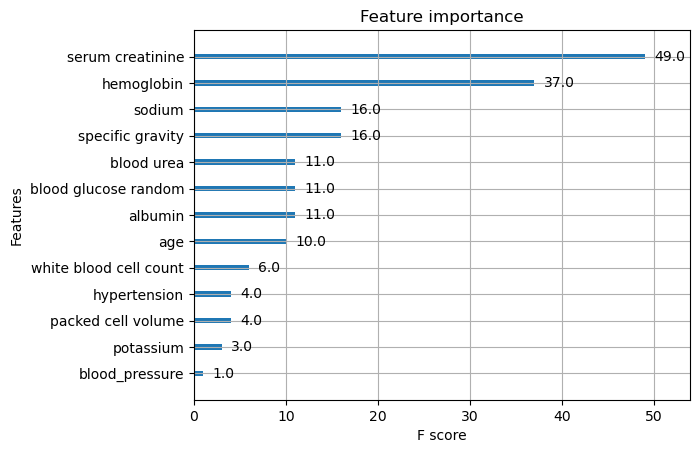

In [9]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x= ds.drop('classes', axis = 1)
y = ds.classes

model.fit(x, y)

#Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [10]:
sel_cols = ['serum creatinine', 'hemoglobin', 'sodium', 'specific gravity', 'blood urea',
            'blood glucose random', 'albumin', 'classes']

new_data = ds[sel_cols]
new_data.head()

,serum creatinine,hemoglobin,sodium,specific gravity,blood urea,blood glucose random,albumin,classes
0,1.2,15.4,138.0,1.020,36.0,121.0,1.0,0
1,0.8,11.3,138.0,1.020,18.0,121.0,4.0,0
2,1.8,9.6,138.0,1.010,53.0,423.0,2.0,0
3,3.8,11.2,111.0,1.005,56.0,117.0,4.0,0
4,1.4,11.6,138.0,1.010,26.0,106.0,2.0,0


In [11]:
#------ Modelling ---------
from sklearn.model_selection import train_test_split

x = new_data.drop('classes', axis = 1)
y = new_data.classes

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (358, 7)
Xtest: (40, 7)
Ytrain: (358,)
Ytest: (40,)


,serum creatinine,hemoglobin,sodium,specific gravity,blood urea,blood glucose random,albumin,classes
206,3.9,13.8,135.0,1.010,96.0,109.0,1.0,0
167,0.9,12.7,138.0,1.020,19.0,139.0,0.0,0
342,0.5,15.0,138.0,1.020,46.0,95.0,0.0,1
83,1.0,12.7,134.0,1.015,19.0,127.0,1.0,0
256,0.5,14.5,146.0,1.025,10.0,131.0,0.0,1
...,...,...,...,...,...,...,...,...
35,2.0,12.0,138.0,1.020,39.0,270.0,2.0,0
325,1.2,14.0,140.0,1.020,50.0,100.0,0.0,1
66,1.6,12.7,131.0,1.020,55.0,150.0,2.0,0
15,9.6,7.6,141.0,1.015,162.0,76.0,3.0,0


<Axes: xlabel='classes', ylabel='count'>

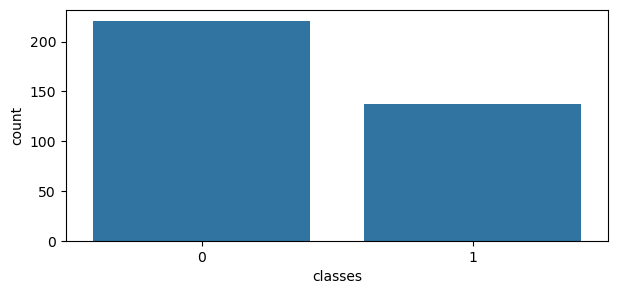

In [12]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['classes'])

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

xgb_model = xgb.XGBClassifier()

x = new_data.drop('classes', axis = 1)
y = new_data['classes']

xgb_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [15]:
#Model Saving
joblib.dump(xgb_model, open('kidneydiseasepredictionmodel.pkl','wb'))